<a href="https://colab.research.google.com/github/saish15/Machine-Learning/blob/master/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Real-Time Face Mask Detection Using Deep Learning and OpenCV**


**Import Required Libraries**

In [ ]:
import cv2,os
import numpy as np
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import  Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Face_recognition"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
with_mask  without_mask


In [ ]:
data= os.listdir('../content/drive/My Drive/Face_recognition')
data

['without_mask', 'with_mask']

In [ ]:
#use the file path where the dataset is stored
data_path = r'../content/drive/My Drive/Face_recognition'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]



**Make lists for data and target:**

In [ ]:
img_size = 150
data = []
target = []
for category in categories:
    folder_path = os.path.join(data_path,category) 
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img = cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
            print("Exception: ",e)

**Design a Convolutional Neural Network (CNN) Model**

In [ ]:
#data values are normalized
data = np.array(data)/255.0

#reshaping of data                                                
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)
new_target = np_utils.to_categorical(target)

#saving the files
np.save('data',data)
np.save('target',new_target)

In [ ]:
data = np.load('../content/drive/My Drive/data_harr/data.npy')
target = np.load('../content/drive/My Drive/data_harr/target.npy')

model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_4 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_5 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 52900)            

**Train the Model**

In [ ]:
#10% of data as testing and 90% as training data
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [ ]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose = 0, save_best_only = True,mode='auto')
history = model.fit(train_data,train_target,epochs = 20, callbacks = [checkpoint], validation_split = 0.2)

Epoch 1/20
31/31 [==============================] - 78s 2s/step - loss: 0.8860 - acc: 0.4987 - val_loss: 0.6633 - val_acc: 0.6573
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
31/31 [==============================] - 91s 3s/step - loss: 0.6306 - acc: 0.6589 - val_loss: 0.5139 - val_acc: 0.7782
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
31/31 [==============================] - 76s 2s/step - loss: 0.4127 - acc: 0.8218 - val_loss: 0.4060 - val_acc: 0.8065
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
31/31 [==============================] - 76s 2s/step - loss: 0.2689 - acc: 0.8739 - val_loss: 0.3025 - val_acc: 0.8790
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
31/31 [==============================] - 75s 2s/step - loss: 0.1688 - acc: 0.9575 - val_loss: 0.2895 - val_acc: 0.8871
INFO:tensorflow:Assets written to: model-005.model/assets
Epoch 6/20
31/31 [==============================] - 76s 2s/s

**Evaluate the Model**

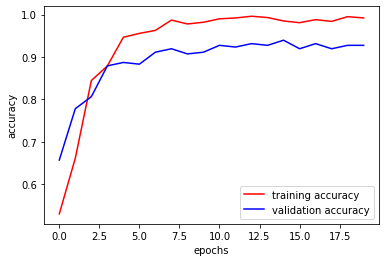

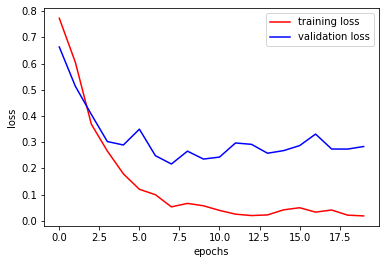

In [ ]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],'b',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 525ms/step - loss: 0.3202 - acc: 0.9348
[0.32017114758491516, 0.9347826242446899]



**Detect the Face Masks using the HaarCascade_frontalface_default.xml file in real time**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:

model = load_model('model-009.model') #load the best model

faceCascade=cv2.CascadeClassifier(r'C:\Users\ALEX MANENO\Desktop\AI&ML2020\5. Deep Learning\Tests & Assignments\Test 2\haarcascade_frontalface_default.xml')

video_capture = cv2.VideoCapture(0)  #starts the webcam

labels_dict = {0:'NO MASK',1:'MASK'}
color_dict  = { 0:(0,0,255),1:(0,255,0)}

while(True):
    ret,frame = filename.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.3,5)
    
    for x,y,w,h in faces:
        face_img = gray[y:y+w,x:x+h]
        resized = cv2.resize(face_img,(img_size,img_size))
        normalized = resized/255.0
        reshaped = np.reshape(normalized,(1,img_size,img_size,1))
        result = model.predict(reshaped)
        
        label = np.argmax(result,axis=1)[0]
        cv2.rectangle(frame,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.putText(frame,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow('Video',frame)
    key=cv2.waitKey(1)
    
    if(key==27):
        break;
        
cv2.destroyAllWindows()
.release()